In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def x_mm_to_units(mm):
    return int(mm * 4000 / 8 )

def alpha_angle_to_units(angle):
    return int(angle * 4000 / 360)
    
mm2units = np.vectorize(x_mm_to_units)
angle2units = np.vectorize(alpha_angle_to_units)

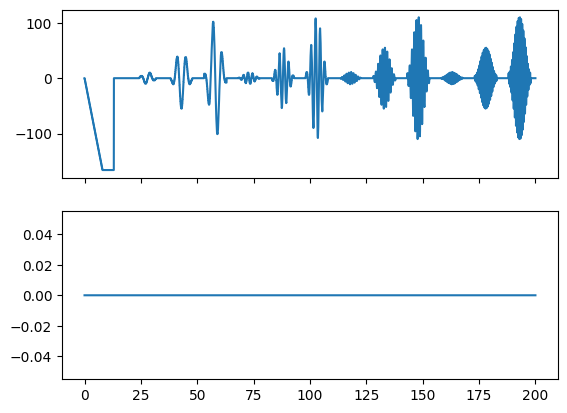

In [178]:
t_total = 200
t = np.linspace(0, t_total, t_total*100)

t_rampa_init = 8
ramp = np.pad(np.linspace(0, -15, t_rampa_init*100),(0, t_total*100-t_rampa_init*100), 'constant', constant_values=(0,-15))

t_inicio_step = 13
step_x = 15*np.heaviside(t-t_inicio_step, 0.5)

ventanas = {'rect': np.ones, 'triangular': np.bartlett, 'blackman': np.blackman, 'hamming': np.hamming, 'hanning': np.hanning, 'kaiser1': lambda x: np.kaiser(x, 1), 'kaiser2': lambda x: np.kaiser(x, 2), 'kaiser3': lambda x: np.kaiser(x, 3), 'kaiser4': lambda x: np.kaiser(x, 4)}

t_inicio_sin = 23
t_sin = 10
amplitud_sin = 1
freq_sin = 0.5
ventana = ventanas['hamming']
sin1_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

t_inicio_sin = 38
t_sin = 10
amplitud_sin = 5
freq_sin = 0.5
ventana = ventanas['hamming']
sin2_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

t_inicio_sin = 53
t_sin = 10
amplitud_sin = 10
freq_sin = 0.5
ventana = ventanas['hamming']
sin3_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

t_inicio_sin = 68
t_sin = 10
amplitud_sin = 1
freq_sin = 1
ventana = ventanas['hamming']
sin4_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

t_inicio_sin = 83
t_sin = 10
amplitud_sin = 5
freq_sin = 1
ventana = ventanas['hamming']
sin5_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

t_inicio_sin = 98
t_sin = 10
amplitud_sin = 10
freq_sin = 1
ventana = ventanas['hamming']
sin6_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

t_inicio_sin = 113
t_sin = 10
amplitud_sin = 1
freq_sin = 2
ventana = ventanas['hamming']
sin7_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

t_inicio_sin = 128
t_sin = 10
amplitud_sin = 5
freq_sin = 2
ventana = ventanas['hamming']
sin8_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

t_inicio_sin = 143
t_sin = 10
amplitud_sin = 10
freq_sin = 2
ventana = ventanas['hamming']
sin9_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

t_inicio_sin = 158
t_sin = 10
amplitud_sin = 1
freq_sin = 4
ventana = ventanas['hamming']
sin10_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

t_inicio_sin = 173
t_sin = 10
amplitud_sin = 5
freq_sin = 4
ventana = ventanas['hamming']
sin11_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

t_inicio_sin = 188
t_sin = 10
amplitud_sin = 10
freq_sin = 4
ventana = ventanas['hamming']
sin12_x = np.pad(ventana(t_sin*100), (t_inicio_sin*100,t_total*100-t_sin*100-t_inicio_sin*100)) * amplitud_sin * np.sin(freq_sin*np.pi*t)

ref_x_pos = ramp + step_x + sin1_x + sin2_x + sin3_x + sin4_x + sin5_x + sin6_x + sin7_x + sin8_x + sin9_x + sin10_x + sin11_x + sin12_x
ref_x_pos = angle2units(ref_x_pos)

#ref_x_vel = np.gradient(ref_x_pos)*100

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot(t, ref_x_pos)
ax2.plot(t, ref_x_vel)
plt.show()

In [179]:
#ref_flow = ref_x_pos

ref_alpha_pos = ref_x_pos # np.zeros(t.shape)
ref_alpha_vel = np.gradient(ref_x_pos)*100

ref_x_pos = np.zeros(t.shape)
ref_x_vel = np.gradient(ref_x_pos)*100

ref_z_pos = np.zeros(t.shape)
ref_z_vel = np.gradient(ref_z_pos)*100

In [180]:
flow_route = []
x_route = []
z_route = []
alpha_route = []
notas = []

for i in range(len(t)):
    flow_route.append((t[i], 0))
    x_route.append((t[i], ref_x_pos[i], ref_x_vel[i]))
    z_route.append((t[i], ref_z_pos[i], ref_z_vel[i]))
    alpha_route.append((t[i], ref_alpha_pos[i], ref_alpha_vel[i]))

flow_route = np.array(flow_route)
x_route = np.array(x_route)
z_route = np.array(z_route)
alpha_route = np.array(alpha_route)
notas = np.array(notas)

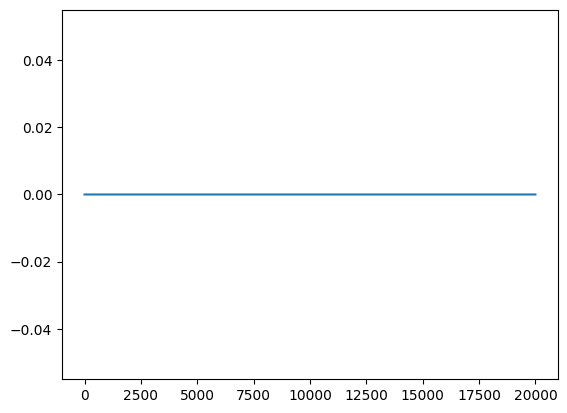

In [181]:
plt.plot(ref_x_pos)

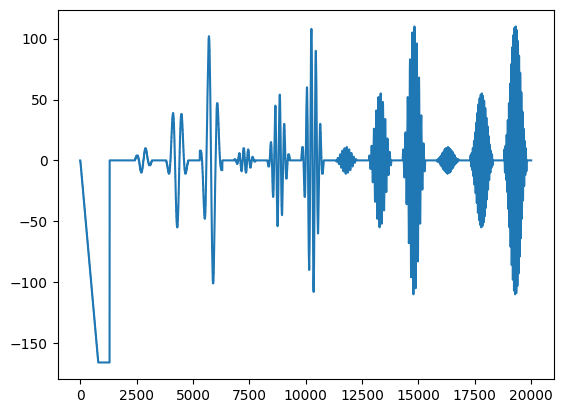

In [182]:
plt.plot(alpha_route[:,1])

In [183]:
np.savez("C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/testalpha", flow=flow_route, x=x_route, z=z_route, alpha=alpha_route, notes=notas)

In [184]:
route = np.load("C:/Users/ferna/Dropbox/UC/Magister/robot-flautista/exercises/data/important/testalpha.npz")

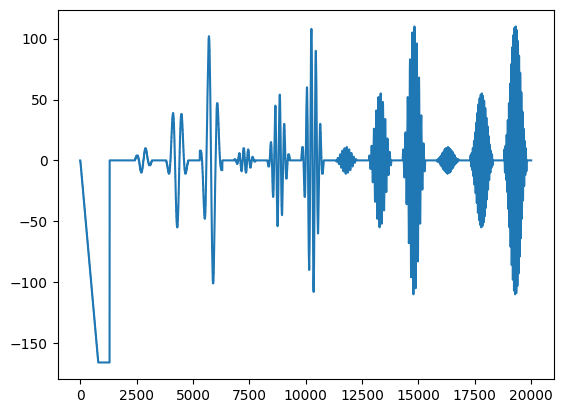

In [185]:
plt.plot(route['alpha'][:,1])